In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from pathlib import Path
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy_financial as npf
from datetime import timedelta

color_da_node = "#4477aa"
color_id_node = "#66ccee"
color_fcr_node = "#84CA90"
color_solar_node = "#ccbb44"
color_bess_node = "#ee7733"
color_sre_node = "#ee6677"
color_tre_node = "#aa3377"
color_else2 = "#bbbbbb"

eth_blue = "#215CAF"
eth_petrol = "#279CB6"
eth_lightgreen = "#6CBF84"
eth_green = "#627313"
eth_yellow = "#E6A91A"
eth_orange = "#ee7733"
eth_bronce = "#8E6713"
eth_red = "#B7352D"
eth_purple = "#A7117A"
eth_gray = "#6F6F6F"
eth_gray = "#C2C2C2"

# ------------------------ Load Excel ------------------------
# Set repo_root to the parent directory above Case_Plots_Sources
repo_root = Path().resolve().parent
output_folder = repo_root / "Report_Plottings" / "output"
#
#repo_root = Path(__file__).parent.parent

inflation_rate = 0.0175
case = 1  # 1: Stand Alone
scenario_name = 3 # 2: 1.2_FCR 3: 0.8_FCR
def input_parameter(case):
    if case == 1:
        bat_cost = 6875000  # CHF
        bat_operation_maintenance = 171875 # CHF 3% of bat_cost
        ekz_energy_margin = 0  # [CHF/MWh]
        ekz_solar_contracting = 0  # [CHF/MWh]
        ekz_baas_contracting = 0 #[CHF/MWh]
        grid_connection_cost = 0  # CHF/year
        MVarh_cost = 0  # CHF/year
    else:
        return "No valid case selected"
    return bat_cost, bat_operation_maintenance, ekz_energy_margin, ekz_baas_contracting, ekz_solar_contracting, grid_connection_cost, MVarh_cost

def input_files(case,scenario_name):
    if case == 1 and scenario_name == 1:
        return [
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2026_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2027_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2028_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2029_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2030_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2031_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2032_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2033_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2034_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2035_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2036_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2037_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2038_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2039_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_Base_Case" / f"2040_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results.xlsx"
        ]
    elif case == 1 and scenario_name == 2:
        return [
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2026_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2027_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2028_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2029_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2030_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2031_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2032_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2033_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2034_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2035_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2036_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2037_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2038_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2039_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_FCR" / f"2040_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2FCR.xlsx"
        ]
    elif case == 1 and scenario_name == 3:  
        return [
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2026_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2027_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2028_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2029_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2030_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2031_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2032_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2033_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2034_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2035_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2036_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2037_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2038_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2039_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_FCR" / f"2040_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx"
        ]
    elif case == 1 and scenario_name == 4:
        return [
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2026_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2027_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2028_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2029_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2030_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2031_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2032_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2033_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2034_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2035_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2036_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2037_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2038_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2039_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_1_2_Price" / f"2040_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_1_2Price.xlsx"
        ]
    elif case == 1 and scenario_name == 5:
        return [
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2026_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2027_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2028_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2029_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2030_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx", 
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2031_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2032_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2033_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2034_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2035_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2036_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2037_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2038_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2039_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx",
            repo_root / "Result Storage" / "Stand_Alone_0_8_Price" / f"2040_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8Price.xlsx"
        ]
    else:
        print("No valid case/scenario selected")
        return []

bat_cost, bat_operation_maintenance, ekz_energy_margin, ekz_baas_contracting, ekz_solar_contracting, grid_connection_cost, MVarh_cost = input_parameter(case)
input_files = input_files(case,scenario_name)
print(input_files)

[WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/Stand_Alone_0_8_FCR/2026_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/Stand_Alone_0_8_FCR/2027_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/Stand_Alone_0_8_FCR/2028_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/Stand_Alone_0_8_FCR/2029_(Base_Case_Scenario)_Stand_Alone_25000.0kWh-Results_0_8FCR.xlsx'), WindowsPath('C:/Users/TJANWALL/OneDrive - Elektrizitätswerke des Kantons Zürich/Dokumente/02_VS CODE/Result Storage/Stand_Alone_0_8_FCR/2030_(Base_Case_Scenario)_Stand

In [ ]:
# Extract and concatenate 'Summary Solar-Bess' sheets from all input files
df_stand_alone_sum_solar_bess = []
df_stand_alone_sum_solar = []
for idx, file in enumerate(input_files):
    df_1 = pd.read_excel(file, sheet_name='Summary Solar-Bess')
    df_2 = pd.read_excel(file, sheet_name='Summary Solar')
    # Check if the first row is a duplicate header (string type, matches columns)
    if idx == 0:
        df_stand_alone_sum_solar_bess.append(df_1)
        df_stand_alone_sum_solar.append(df_2)
    else:
        # If the first row is a header, drop it; otherwise, append all rows
        if (df_1.iloc[0].astype(str).tolist() == df_1.columns.astype(str).tolist()):
            df_stand_alone_sum_solar_bess.append(df_1.iloc[1:])
            df_stand_alone_sum_solar.append(df_2.iloc[1:])
        else:
            df_stand_alone_sum_solar_bess.append(df_1)
            df_stand_alone_sum_solar.append(df_2)
df_stand_alone_sum_solar_bess = pd.concat(df_stand_alone_sum_solar_bess, ignore_index=True)
df_stand_alone_sum_solar = pd.concat(df_stand_alone_sum_solar, ignore_index=True)

# Print the whole dataframe
#print(df_stand_alone_sum_solar_bess)
#print(df_stand_alone_sum_solar)

In [260]:
print("Number of cycles:", df_stand_alone_sum_solar_bess['Total Cycles'].sum())

Number of cycles: 7902.464916588502


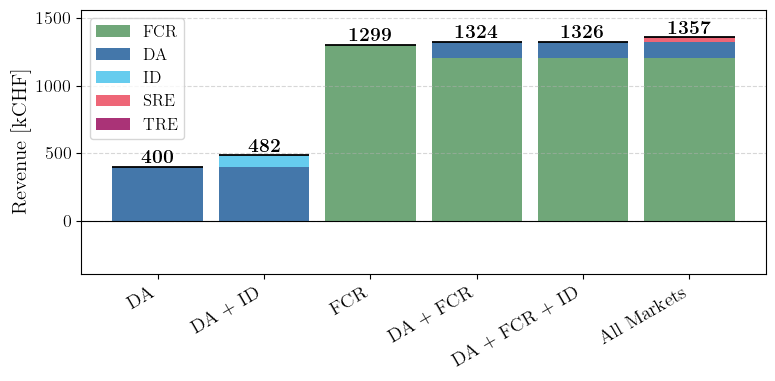

In [270]:
def revenue_comparison(df_sum_solar_bess, df_sum_solar, output_folder):

    # -----------------------------
    # --- LaTeX Formatting -------
    # -----------------------------
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 13
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['text.latex.preamble'] = (
        r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{amstext}'
    )

    # X-axis labels (6 scenarios)
    labels = [
        "DA",
        "DA + ID",
        "FCR",
        "DA + FCR",
        "DA + FCR + ID",
        "All Markets",
    ]

    x = np.arange(len(labels))

    # Revenue components [FCR, DA, ID, SRE, TRE], values in kCHF
    only_fcr      = [1299181,        0,        0,       0,       0]
    only_da       = [      0,   400182,        0,       0,       0]
    da_id         = [      0,   400182,    82269,       0,       0]
    da_fcr        = [1207430,   116251,        0,       0,       0]
    da_fcr_id     = [1207430,   116251,     2111,       0,       0]
    all_markets   = [1207430,   116251,   -445, 27915,  5851]

    # Shape = 5 components × 6 scenarios
    scenarios = np.array([
        only_da,
        da_id,
        only_fcr,
        da_fcr,
        da_fcr_id,
        all_markets
    ]).T/1000

    # Colors for FCR → DA → ID → SRE → TRE
    colors = [
        "#70A779",  # FCR
        "#4477AA",  # DA
        "#66CCEE",  # ID
        "#EE6677",  # SRE
        "#AA3377",  # TRE
    ]

    # --- Plot setup ---
    fig, ax = plt.subplots(figsize=(8, 4))
    width = 0.85

    bottom_pos = np.zeros(len(x))
    bottom_neg = np.zeros(len(x))

    # Loop over components
    for i in range(scenarios.shape[0]):
        comp = scenarios[i]
        pos = np.where(comp > 0, comp, 0)
        neg = np.where(comp < 0, comp, 0)

        ax.bar(x, pos, width, bottom=bottom_pos, color=colors[i])
        ax.bar(x, neg, width, bottom=bottom_neg, color=colors[i])

        bottom_pos += pos
        bottom_neg += neg

    # Total revenues
    total_revenue = bottom_pos + bottom_neg

    for i in range(len(x)):
        ax.hlines(
            total_revenue[i],
            x[i] - width/2, x[i] + width/2,
            color="black", linewidth=1.3
        )
        ax.text(
            x[i],
            total_revenue[i],
            rf'\textbf{{{int(round(total_revenue[i]))}}}',
            ha='center',
            va='bottom',
            fontsize=14
        )

    ax.set_ylabel(r'Revenue [kCHF]', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=14)
    ax.set_ylim(-400, max(total_revenue) * 1.15)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Legend
    ax.legend(
        [plt.bar(0, 0, color=c)[0] for c in colors],
        [r'\text{FCR}', r'\text{DA}', r'\text{ID}', r'\text{SRE}', r'\text{TRE}'],
        loc='upper left',
        fontsize=12
    )
    
    jpg_path = os.path.join(output_folder, "Revenue_Stacking.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()


revenue_comparison(df_stand_alone_sum_solar_bess, df_stand_alone_sum_solar, output_folder)

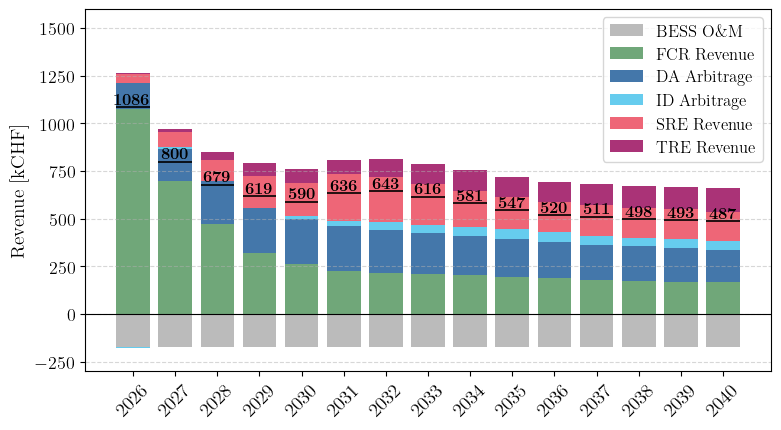

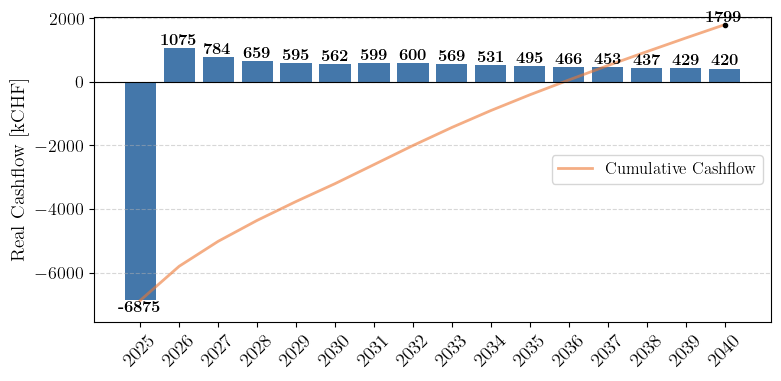

NPV Nominal: 2430491.73 CHF
NPV Real (1.00%): 1798877.30 CHF
IRR: 4.60 %
Number of cycles: 7902.464916588502


In [271]:
def revenue_lifetime(df_sum_solar_bess, df_sum_solar):

    # -----------------------------
    # --- LaTeX Formatting -------
    # -----------------------------
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 13
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{amstext}'

    # --- Prepare data ---
    years = df_sum_solar['Year'] if 'Year' in df_sum_solar.columns else range(len(df_sum_solar))
    years = np.array(years)
    labels = years

    def extract_revenues(df, is_solar):
        r_pv_grid = df['Revenue Feed-in (CHF)'].astype(float)
        r_pv_load = df['Energy from PV to Load (MWh)'].astype(float) * ekz_solar_contracting

        if is_solar:
            r_bess_operation = df['Energy from Grid to Load (MWh)'] * 0
            r_fcr = df['Energy from Grid to Load (MWh)'] * 0
            r_da_arbitrage = df['Energy from Grid to Load (MWh)'] * 0
            r_id_arbitrage = df['Energy from Grid to Load (MWh)'] * 0
            r_sre = df['Energy from Grid to Load (MWh)'] * 0
            r_tre = df['Energy from Grid to Load (MWh)'] * 0
        else:
            r_bess_operation = df['Energy from Grid to Load (MWh)'] * 0 - bat_operation_maintenance
            r_fcr = df_sum_solar_bess['Revenue FCR (CHF)'].astype(float)
            r_da_arbitrage = df_sum_solar_bess['Revenue Arbitrage DA (CHF)'].astype(float)
            r_id_arbitrage = df_sum_solar_bess['Revenue Arbitrage ID (CHF)'].astype(float)
            r_sre = df_sum_solar_bess['Revenue SRE (CHF)'].astype(float)
            r_tre = df_sum_solar_bess['Revenue TRE (CHF)'].astype(float)

        # Convert to thousands (kCHF)
        return tuple(x / 1000 for x in [
            r_bess_operation,
            r_fcr,
            r_da_arbitrage,
            r_id_arbitrage,
            r_sre,
            r_tre
        ])

    # Extract (scaled) revenues
    r1 = extract_revenues(df_sum_solar, True)
    r2 = extract_revenues(df_sum_solar_bess, False)

    # --- Plot 1: Revenue comparison (stacked, kCHF) ---
    x = np.arange(len(years))
    width = 0.8  

    fig, ax = plt.subplots(figsize=(8, 4.5))

    colors = [
        "#bbbbbb",
        "#70A779",
        "#4477aa",
        "#66ccee",
        "#ee6677",
        "#aa3377",
    ]

    # Stacked bars
    bottom_pos = np.zeros(len(years))
    bottom_neg = np.zeros(len(years))

    for i, c in enumerate(r2):
        c = np.array(c)
        pos = np.where(c > 0, c, 0)
        neg = np.where(c < 0, c, 0)
        ax.bar(x, pos, width, bottom=bottom_pos, color=colors[i], alpha=1)
        ax.bar(x, neg, width, bottom=bottom_neg, color=colors[i], alpha=1)
        bottom_pos += pos
        bottom_neg += neg

    # Total revenue lines (still in kCHF)
    total_revenue = bottom_pos + bottom_neg

    for i in range(len(years)):
        ax.hlines(
            total_revenue[i],
            x[i] - width/2, x[i] + width/2,
            colors="black", linewidth=1.2
        )

        ax.text(
            x[i],
            total_revenue[i],
            rf'\textbf{{{int(round(total_revenue[i]))}}}',
            ha='center',
            va='bottom',
            fontsize=12
        )

    # Styling
    #ax.set_xlabel(r'\textbf{Year}', fontsize=11)
    ax.set_ylabel(r'Revenue [kCHF]', fontsize=14)
    ax.set_ylim(-300, 1600)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=14)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    ax.legend(
        [plt.bar(0, 0, color=c)[0] for c in colors],
        [
            r'\text{BESS O\&M}',
            r'\text{FCR Revenue}',
            r'\text{DA Arbitrage}',
            r'\text{ID Arbitrage}',
            r'\text{SRE Revenue}',
            r'\text{TRE Revenue}',
        ],
        loc='upper right',
        fontsize=12
    )

    jpg_path = os.path.join(output_folder, "Stand_Alone_Revenues.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()

    # ----------------------------------------------------------------
    # --- Plot 2: Cashflow (kCHF) with cumulative break-even line
    # ----------------------------------------------------------------
    inflation_rate = 0.01      # 1%

    cashflow_diff = np.sum(np.array(r2), axis=0) - np.sum(np.array(r1), axis=0)

    # kCHF conversion
    cashflow_nominal = np.array([-bat_cost / 1000] + list(cashflow_diff))

    # ---- Inflation adjustment (all years after 2025) ----
    cashflow_real = cashflow_nominal.copy()
    for t in range(1, len(cashflow_real)):
        cashflow_real[t] = cashflow_real[t] / ((1 + inflation_rate) ** t)

    # ---- Cumulative cashflow (real) ----
    cumsum_cf = np.cumsum(cashflow_real)

    labels_cf = ['2025'] + list(labels)
    x = np.arange(len(cashflow_real))

    fig, ax = plt.subplots(figsize=(8, 4))

    # ---- Cashflow bars (real, inflation-adjusted) ----
    bars = ax.bar(x, cashflow_real, color=color_da_node, alpha=1)

    for bar in bars:
        y = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            y,
            rf'\textbf{{{int(round(y))}}}',
            ha='center',
            va='bottom' if y > 0 else 'top',
            fontsize=12
        )

    # ---- Cumulative line (break-even curve) ----
    ax.plot(
        x,
        cumsum_cf,
        color=color_bess_node,
        linewidth=2.0,
        marker="",
        markersize=5,
        alpha=0.6,
        label=r'\text{Cumulative Cashflow}'  # Label for legend
    )

    # Label cumulative points
    for i in range(15, len(cumsum_cf)):
        ax.text(
            x[i],
            cumsum_cf[i],
            rf'\textbf{{{int(round(cumsum_cf[i]))}}}',
            ha='center',
            va='bottom',
            fontsize=12
        )

    # Plot last cumulative point with a marker
    ax.plot(
        x[-1], cumsum_cf[-1],
        marker="o", color="black", markersize=3
    )

    # ---- Add a legend for the "Cumulative NPV" line ----
    ax.legend(loc='center right', fontsize=12)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(labels_cf, rotation=45, ha='center', fontsize=14)

    ax.set_ylabel(r'Real Cashflow [kCHF]', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_ylim(min(cashflow_real)*1.1, max(cashflow_real)*1.9)

    jpg_path = os.path.join(output_folder, "Stand_Alone_Cashflow.jpg")
    plt.savefig(jpg_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()
   

    # Print KPIs still in CHF
    print(f"NPV Nominal: {np.sum(cashflow_nominal)*1000:.2f} CHF")
    print(f"NPV Real ({inflation_rate*100:.2f}%): {npf.npv(inflation_rate, cashflow_nominal)*1000:.2f} CHF")
    irr = npf.irr(cashflow_nominal * 1000)
    print(f"IRR: {irr*100:.2f} %")
    print(f"Number of cycles: {np.sum(df_stand_alone_sum_solar_bess['Total Cycles'])}")

revenue_lifetime(df_stand_alone_sum_solar_bess, df_stand_alone_sum_solar)


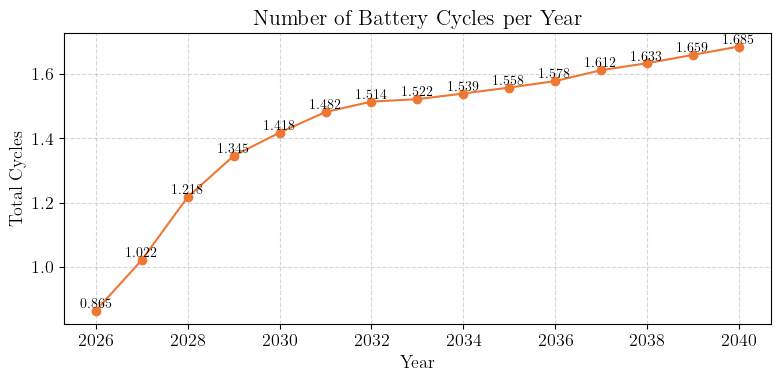

In [272]:
plt.figure(figsize=(8, 4))
years = df_stand_alone_sum_solar_bess['Year']
cycles_per_year = df_stand_alone_sum_solar_bess['Total Cycles'] / 365
plt.plot(years, cycles_per_year, marker='o', color=color_bess_node)
plt.xlabel('Year')
plt.ylabel('Total Cycles')
plt.title('Number of Battery Cycles per Year')
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate the number of cycles on each point
for x, y in zip(years, cycles_per_year):
    plt.text(x, y, f"{y:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

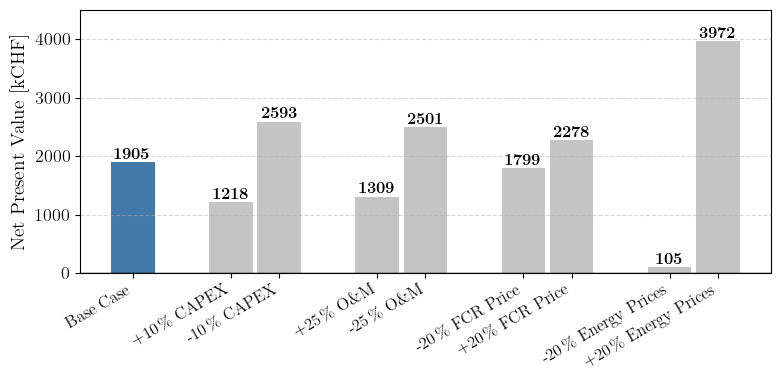

In [273]:

def plot_sensitivity_analysis(base_npv, bars, output_folder, group_spacing=0.8, bar_width=0.4):
    """
    bars: list of (label, value, group) entries, e.g.
          [("Base Case", 1905, 0),
           ("Investment", 900, 1), 
           ("Investment", 1100, 1),
           ("Opex", 900, 2),
           ("Opex", 1050, 2),
           ("Energy", 1000, 3),
           ("Energy", 1200, 3)]
    group_spacing controls separation between bar groups.
    bar_width controls the width of individual bars.
    """
    
    # -----------------------------
    # --- LaTeX Formatting -------
    # -----------------------------
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']
    mpl.rcParams['font.size'] = 13
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{amstext}'

    # Compute x positions with spacing between groups
    x_positions = []
    current_x = 0
    last_group = bars[0][2]

    for label, value, group in bars:
        if group != last_group:
            current_x += group_spacing     # spacing between pairs
        x_positions.append(current_x)
        current_x += bar_width * 1.1           # bar width (adjustable)
        last_group = group

    values = [b[1] for b in bars]
    labels = [b[0] for b in bars]

    # Define colors for bars
    colors = []
    for label, val, group in bars:
        if "Investment" in label:
            colors.append("#c4c4c4")  # Light blue
        elif "Base Case" in label:
            colors.append("#4477aa")  # Dark blue
        elif "Energy" in label:
            colors.append("#c4c4c4")  # Red
        else:
            colors.append("#c4c4c4")  # Base case color

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(8, 4))

    bars_plot = ax.bar(x_positions, values, color=colors, width=bar_width)

    for xi, val in zip(x_positions, values):
        ax.text(
            xi,
            val,
            rf'\textbf{{{int(round(val))}}}',
            ha='center',
            va='bottom',
            fontsize=12
        )

    # Add group labels (one label for each pair)
    unique_groups = sorted(set([b[2] for b in bars]))

    # --- Axis formatting ---
    ax.set_xticks(x_positions)
    ax.set_xticklabels([rf'\text{{{bars[i][0]}}}' for i in range(len(bars))],
                   rotation=30, ha='right', fontsize=12)

    ax.set_ylabel(r'\text{Net Present Value [kCHF]}', fontsize=14)
    #ax.set_title(r'\text{Sensitivity Analysis of NPV}', fontsize=16)
    ax.axhline(0, color="black", linewidth=1)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.set_ylim(0, 4500)

    # Ensure output directory exists
    os.makedirs(output_folder, exist_ok=True)
    save_path = os.path.join(output_folder, "sensitivity_analysis_npv.jpg")
    plt.savefig(save_path, dpi=1000, bbox_inches='tight', pad_inches=0.05)

    plt.tight_layout()
    plt.show()

# Example usage
base_npv = 1905

# Define bars with their corresponding groups
bars = [
    ("Base Case", base_npv, 0),  # Base case on the leftmost position
    ("+10\,\% CAPEX", 1218, 1),      # Investment Low
    ("-10\,\% CAPEX", 2593, 1),     # Investment High
    ("+25\,\% O\&M", 1309, 2),           # Opex Low
    ("-25\,\% O\&M", 2501, 2),          # Opex High
    ("-20\,\% FCR Price", 1799, 3),        # Energy Low
    ("+20\,\% FCR Price", 2278, 3),         # Energy High
    ("-20\,\% Energy Prices", 105, 4),        # Energy Low
    ("+20\,\% Energy Prices", 3972, 4)         # Energy High
]

# Set the bar width to a custom value, e.g., 0.3 (adjust this value as needed)
bar_width = 0.7

plot_sensitivity_analysis(base_npv, bars, output_folder, bar_width=bar_width)
